# 树
**目录：**

## 一、完全m叉树
**定义：** 
> 除了最后一层，其余各层全部填满的m叉树称为完全m叉树。

**性质：**
1. 叶子节点全部分布于最后一层和倒数第二层
2. 节点个数为n的完全m叉树有 $ceil(log_{m}(n*(m-1)+1))$ 层
3. 完全m叉树中第k个节点在第 $ceil(log_{m}(k*(m-1)+1))$ 层

### 例题：子树的大小
> 题目链接：[子树的大小（蓝桥杯）](https://www.lanqiao.cn/problems/3526/learning/?page=37&first_category_id=1&second_category_id=3)

In [ ]:
from math import ceil,log
# 求出第k个节点在完全m叉树中对应的子树节点的总个数
T = int(input())
for _ in range(T):
    n,m,k = map(int,input().split())
    depth = ceil(log(n*(m-1)+1, m))
    rootDepth = ceil(log(k*(m-1)+1, m))
    # 相当于求以第k个节点为根节点的子树的节点总数
    # 先求出子树除倒数第一层以外的节点总和
    if rootDepth < depth:
        ans = (m**(depth-rootDepth)-1)//(m-1)
        # 求出k节点在本层中的序号，以便确认子树在最后一层的范围
        indexK = k - (m**(rootDepth-1)-1)//(m-1)
        # 求最后一层节点的个数
        nodes = n - (m**(depth-1)-1)//(m-1)
        if nodes > (indexK-1)*(m**(depth-rootDepth)):
            # 将子树在最后一层的节点添加到答案中
            # 最后一层的子树节点最多不超过 m**(depth-rootDepth)
            ans += min(nodes - (indexK-1)*(m**(depth-rootDepth)), m**(depth-rootDepth))
    else:
        ans = 1
    print(ans)

## 二、n叉树转二叉树

### 例题 左孩子右兄弟
> 题目链接：[左孩子右兄弟（蓝桥杯）](https://www.lanqiao.cn/problems/1451/learning/?page=1&first_category_id=1&second_category_id=3&name=%E5%B7%A6%E5%AD%A9%E5%AD%90%E5%8F%B3%E5%85%84%E5%BC%9F)

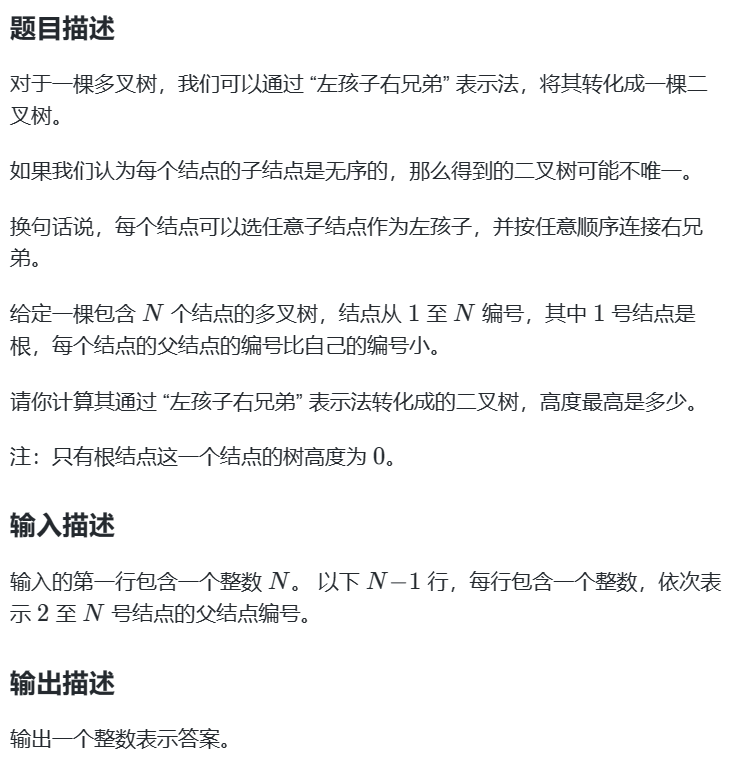

In [ ]:
import sys
# 递归默认最大深度是1000，大概率不够用，可以扩大递归深度限制
sys.setrecursionlimit(100000)

def dfs(cur):
    global tree
    # 递归出口
    if not tree[cur]:
        # 叶子节点的孩子树的高度为0
        return 0
    # 是分支节点
    # 找出其最高的孩子树高度
    temp = 0
    for child in tree[cur]:
        temp = max(temp, dfs(child))
    # 通过分析树形可知当最高的孩子树被放在孩子链的末尾时当前节点有最大高度
    return len(tree[cur]) + temp

# 按照题意，适合采用模拟邻接表的方式接收输入
n = int(input())
# tree[i]:是一个列表，存储i节点所有的孩子节点
tree = [[] for i in range(n+1)]
# 接收输入
for i in range(2,n+1):
    parent = int(input())
    tree[parent].append(i)

# 输出结果
print(dfs(1))